In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)


In [6]:
# View all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station 

In [8]:
# Create our session (link) from Python to the DB

session = Session(engine)

# Exploratory Precipitation Analysis

In [63]:
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [64]:
# Find the most recent date in the data set.
engine.execute('SELECT max(date) FROM measurement LIMIT 10').fetchall()

[('2017-08-23',)]

In [78]:
engine.execute('SELECT * FROM measurement LIMIT 10').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

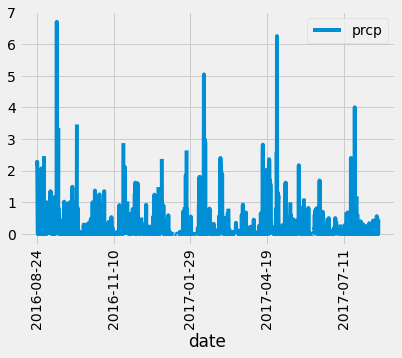

In [65]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.

# Perform a query to retrieve the data and precipitation scores

precip_results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= "2016-08-24").\
    filter(Measurement.date <= "2017-08-23").all()

# Save the query results as a Pandas DataFrame and set the index to the date column
precip_results_df = pd.DataFrame(precip_results).set_index('date')

# Sort the dataframe by date
precip_results_df= precip_results_df.sort_values(by= 'date') 

# Use Pandas Plotting with Matplotlib to plot the data

precip_results_df.plot(rot=90)
plt.show()



In [66]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_results_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [67]:
inspector = inspect(engine)
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [68]:
# Design a query to calculate the total number stations in the dataset

station_count = session.query(Station.station).count()

print({station_count})

{9}


In [69]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

station_data = session.query(Station.station, Station.name).order_by(Station.name.desc()).all()

station_data_df = pd.DataFrame(station_data)

station_data_df.head()

station_mode = station_data_df.describe()

station_mode

,station,name
count,9,9
unique,9,9
top,USC00511918,"WAIKIKI 717.2, HI US"
freq,1,1


In [70]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

station = 'USC00511918'

active_station = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs))\
    .filter(Measurement.station == station).all()

active_station

[(53.0, 87.0, 71.61596766043456)]

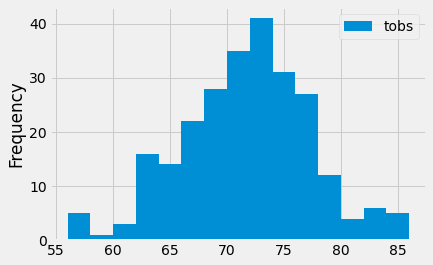

In [101]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

station = 'USC00511918'

station_precip_results = session.query(Measurement.station, Measurement.date, Measurement.tobs).\
filter(Measurement.station == station).\
filter(Measurement.date >= "2014-10-30").\
filter(Measurement.date <= "2015-10-30").all()

station_precip_results_df = pd.DataFrame(station_precip_results)
station_precip_results_df

station_precip_results_df = pd.DataFrame(station_precip_results)

station_precip_results_df.plot.hist(bins=15)

# Close session

In [102]:
# Close Session
session.close()